In [ ]:
import pandas as pd
##

hashtag_posts= pd.read_csv("/Users/ritushetkar/Downloads/hashtag_posts_unnested.csv")
profile_posts=pd.read_csv("/Users/ritushetkar/env_capstone/skincare_analysis/data/profile_posts_unnested.csv")
tiktok_posts=pd.read_csv("/Users/ritushetkar/env_capstone/skincare_analysis/data/tiktok_transcripts.csv")
post_comments=pd.read_csv("/Users/ritushetkar/env_capstone/skincare_analysis/data/post_comments.csv")



/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_5726/3810696723.py:3: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  hashtag_posts= pd.read_csv("/Users/ritushetkar/Downloads/hashtag_posts_unnested.csv")
/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_5726/3810696723.py:4: DtypeWarning: Columns (9,26,36,41,50) have mixed types. Specify dtype option on import or set low_memory=False.
  profile_posts=pd.read_csv("/Users/ritushetkar/env_capstone/skincare_analysis/data/profile_posts_unnested.csv")


In [2]:
len(hashtag_posts) 
hashtag_posts.columns

Index(['id', 'text', 'textLanguage', 'createTimeISO', 'isAd', 'isMuted',
       'diggCount', 'shareCount', 'playCount', 'collectCount', 'commentCount',
       'isSlideshow', 'isPinned', 'isSponsored', 'authorMeta_nickName',
       'authorMeta_verified', 'authorMeta_signature',
       'authorMeta_privateAccount', 'authorMeta_ttSeller', 'authorMeta_fans',
       'authorMeta_heart', 'authorMeta_video', 'authorMeta_digg',
       'authorMeta_region', 'authorMeta_musicName', 'authorMeta_musicAuthor',
       'videoMeta_duration', 'videoMeta_definition',
       'detailedMentions_nickName', 'hashtags_name', 'effectStickers_name',
       'searchHashtag_views', 'searchHashtag_name', 'locationMeta_address'],
      dtype='object')

In [3]:
len(tiktok_posts) #tiktok_transcripts
tiktok_posts.columns

Index(['id', 'bucketUrl', 'detected_language', 'transcribed_text',
       'video_description', 'status', 'tokens_used', 'error_message',
       'created_at', 'updated_at'],
      dtype='object')

In [4]:
len(post_comments)
post_comments.columns

Index(['post_id', 'comment_id', 'comment_createTimeISO_comment',
       'text_comment', 'diggCount_comment', 'replyCommentTotal_comment',
       'uniqueId_comment'],
      dtype='object')

In [5]:
len(profile_posts)
profile_posts.columns

Index(['id', 'text', 'textLanguage', 'createTimeISO', 'authorMeta_id',
       'authorMeta_profileUrl', 'authorMeta_nickName', 'authorMeta_verified',
       'authorMeta_signature', 'authorMeta_commerceUserInfo_category',
       'authorMeta_privateAccount', 'authorMeta_roomId', 'authorMeta_ttSeller',
       'authorMeta_following', 'authorMeta_friends', 'authorMeta_fans',
       'authorMeta_heart', 'authorMeta_video', 'authorMeta_digg',
       'authorMeta_region', 'musicMeta_musicName', 'musicMeta_musicAuthor',
       'musicMeta_musicOriginal', 'musicMeta_musicAlbum', 'musicMeta_musicId',
       'webVideoUrl', 'mediaUrls', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'mentions', 'detailedMentions_id',
       'detailedMentions_nickName', 'hashtags_name', 'effectStickers_id',
       'effectStickers_name', 'effectStickers_stickerStats_useCount',
       'slideshowImageLinks_tiktokLink', 'slideshowImageLinks_downloadLink',
       'note', 'locationMeta_city', 'locationMeta_

In [6]:

hashtag_posts['createTimeISO'] = pd.to_datetime(hashtag_posts['createTimeISO'])
# Create new columns
hashtag_posts['date'] = hashtag_posts['createTimeISO'].dt.date
hashtag_posts['month'] = hashtag_posts['createTimeISO'].dt.strftime('%b')   # e.g., 'Feb'
hashtag_posts['year'] = hashtag_posts['createTimeISO'].dt.year
hashtag_posts['week'] = hashtag_posts['createTimeISO'].dt.isocalendar().week


hashtag_posts.head()

,id,text,textLanguage,createTimeISO,isAd,isMuted,diggCount,shareCount,playCount,collectCount,...,detailedMentions_nickName,hashtags_name,effectStickers_name,searchHashtag_views,searchHashtag_name,locationMeta_address,date,month,year,week
0,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,NaN,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
1,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,skincare,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
2,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,formelskin,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
3,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,skin,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
4,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,haut,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8


In [7]:
df_text_filtered = hashtag_posts[hashtag_posts['textLanguage'].isin(['en', 'de'])]
print(len(df_text_filtered)
)
df_text_filtered.head()

116156


,id,text,textLanguage,createTimeISO,isAd,isMuted,diggCount,shareCount,playCount,collectCount,...,detailedMentions_nickName,hashtags_name,effectStickers_name,searchHashtag_views,searchHashtag_name,locationMeta_address,date,month,year,week
0,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,NaN,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
1,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,skincare,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
2,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,formelskin,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
3,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,skin,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
4,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,haut,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8


# Hashtags Over Time



In [8]:
df_text_filtered=df_text_filtered.reset_index()

In [9]:
df_text_filtered.columns

Index(['index', 'id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'isMuted', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSlideshow', 'isPinned', 'isSponsored',
       'authorMeta_nickName', 'authorMeta_verified', 'authorMeta_signature',
       'authorMeta_privateAccount', 'authorMeta_ttSeller', 'authorMeta_fans',
       'authorMeta_heart', 'authorMeta_video', 'authorMeta_digg',
       'authorMeta_region', 'authorMeta_musicName', 'authorMeta_musicAuthor',
       'videoMeta_duration', 'videoMeta_definition',
       'detailedMentions_nickName', 'hashtags_name', 'effectStickers_name',
       'searchHashtag_views', 'searchHashtag_name', 'locationMeta_address',
       'date', 'month', 'year', 'week'],
      dtype='object')

In [10]:
# Are there any rows with empty hashtags
empty_hashtags_count = df_text_filtered[df_text_filtered['hashtags_name'].str.strip() == ''].shape[0]
print("Empty hashtag rows:", empty_hashtags_count)


Empty hashtag rows: 0


In [11]:
hashtag_trends = (
    df_text_filtered.groupby(['year', 'week', 'hashtags_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['year', 'week', 'count'], ascending=[False, False, False])
)

hashtag_trends

,year,week,hashtags_name,count
27100,2025,13,skincare,366
27141,2025,13,skincareroutine,194
26316,2025,13,fyp,178
26782,2025,13,morningroutine,122
26467,2025,13,hautpflege,109
...,...,...,...,...
1,2019,48,beauty,1
2,2019,48,dm,1
3,2019,48,hautpflege,1
4,2019,48,lovethis,1


In [12]:
top_hashtags_this_week = (
    hashtag_trends[hashtag_trends['week'] == df_text_filtered['week'].max()]
    .groupby('hashtags_name')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_hashtags_this_week


hashtags_name
skincareroutine    51
skincare           49
fyp                33
hautpflege         19
foryoupage         17
koreanskincare     17
fy                 14
esthetician        11
estheticiantips    11
foryou             11
Name: count, dtype: int64

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# --- Assume df_text_filtered is already prepared with columns: 'year', 'month', 'week', 'hashtags_name'

# Widgets
year_dropdown = widgets.Dropdown(
    options=sorted(df_text_filtered['year'].unique()),
    description='Year:',
    value=df_text_filtered['year'].max()
)

month_dropdown = widgets.Dropdown(
    options=["All"] + sorted(df_text_filtered['month'].dropna().unique()),
    description='Month:',
    value="All"
)

week_dropdown = widgets.Dropdown(
    options=["All"] + sorted(df_text_filtered['week'].dropna().unique()),
    description='Week:',
    value="All"
)

# Output area
output = widgets.Output()

def update_graphs(change=None):
    with output:
        output.clear_output()
        
        # Filter by year
        filtered = df_text_filtered[df_text_filtered['year'] == year_dropdown.value]
        
        # Optional month filter
        if month_dropdown.value != "All":
            filtered = filtered[filtered['month'] == month_dropdown.value]
        
        # Optional week filter
        if week_dropdown.value != "All":
            filtered = filtered[filtered['week'] == week_dropdown.value]
        
        # Count hashtags
        top_hashtags = (
        filtered['hashtags_name']
        .value_counts()
        .head(10)
        .reset_index()
        .rename(columns={'index': 'hashtags_name'})
        )
        top_hashtags.columns = ['hashtags_name', 'count']  # Make column names explicit


        if top_hashtags.empty:
            print("No data available for this selection.")
            return

        # --- Matplotlib + Seaborn Bar Chart ---
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=top_hashtags,
            x='hashtags_name',
            y='count',
            palette='viridis'
        )
        
        # Add count labels on top of bars
        for index, row in top_hashtags.iterrows():
            plt.text(index, row['count'] + 1, str(row['count']), ha='center', va='bottom', fontsize=10)
        
        # Build dynamic title
        title = f"Top Hashtags in {year_dropdown.value}"
        if month_dropdown.value != "All":
            title += f" - {month_dropdown.value}"
        if week_dropdown.value != "All":
            title += f" - Week {week_dropdown.value}"
        
        plt.title(title, fontsize=14)
        plt.xlabel("Hashtag")
        plt.ylabel("Mentions")
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Show the data table
        display(top_hashtags)

# Trigger when widgets are changed
year_dropdown.observe(update_graphs, names='value')
month_dropdown.observe(update_graphs, names='value')
week_dropdown.observe(update_graphs, names='value')

# Display UI
display(widgets.VBox([year_dropdown, month_dropdown, week_dropdown]))
display(output)

# Initial render
update_graphs()


Output()

## Hashtag Analysis with Enagement 


In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime


df = hashtag_posts.copy()


df['engagement'] = df['diggCount'] + df['shareCount'] + df['commentCount'] + df['collectCount']


df_exploded = df.explode('hashtags_name')

df_exploded.columns



Index(['id', 'text', 'textLanguage', 'createTimeISO', 'isAd', 'isMuted',
       'diggCount', 'shareCount', 'playCount', 'collectCount', 'commentCount',
       'isSlideshow', 'isPinned', 'isSponsored', 'authorMeta_nickName',
       'authorMeta_verified', 'authorMeta_signature',
       'authorMeta_privateAccount', 'authorMeta_ttSeller', 'authorMeta_fans',
       'authorMeta_heart', 'authorMeta_video', 'authorMeta_digg',
       'authorMeta_region', 'authorMeta_musicName', 'authorMeta_musicAuthor',
       'videoMeta_duration', 'videoMeta_definition',
       'detailedMentions_nickName', 'hashtags_name', 'effectStickers_name',
       'searchHashtag_views', 'searchHashtag_name', 'locationMeta_address',
       'date', 'month', 'year', 'week', 'engagement'],
      dtype='object')

In [15]:

hashtag_stats = (
    df_exploded.groupby('hashtags_name')
    .agg(
        total_posts=('id', 'nunique'),
        average_engagement=('engagement', 'mean')
    )
    .sort_values('total_posts', ascending=False)
    .reset_index()
)


weekly = (
    df_exploded.groupby(['week', 'hashtags_name'])['engagement'].mean().reset_index()
)
weekly['relative_engagement_week'] = (
    weekly.groupby('week')['engagement'].transform(lambda x: x / x.max())
)


monthly = (
    df_exploded.groupby(['month', 'hashtags_name'])['engagement'].mean().reset_index()
)
monthly['relative_engagement_month'] = (
    monthly.groupby('month')['engagement'].transform(lambda x: x / x.max())
)

yearly = (
    df_exploded.groupby(['year', 'hashtags_name'])['engagement'].mean().reset_index()
)
yearly['relative_engagement_year'] = (
    yearly.groupby('year')['engagement'].transform(lambda x: x / x.max())
)


relative_avg = (
    weekly.groupby('hashtags_name')['relative_engagement_week'].mean().reset_index()
    .merge(monthly.groupby('hashtags_name')['relative_engagement_month'].mean().reset_index(), on='hashtags_name', how='outer')
    .merge(yearly.groupby('hashtags_name')['relative_engagement_year'].mean().reset_index(), on='hashtags_name', how='outer')
)


hashtag_stats= hashtag_stats.merge(relative_avg, on='hashtags_name', how='left')

hashtag_stats.head(10)



,hashtags_name,total_posts,average_engagement,relative_engagement_week,relative_engagement_month,relative_engagement_year
0,skincare,3293,213603.041063,0.068745,0.028532,0.067266
1,skincareroutine,1961,158738.870863,0.058179,0.021269,0.066696
2,fyp,1471,231781.622722,0.074470,0.031273,0.054873
3,hautpflege,1343,27371.076123,0.014068,0.004730,0.146908
4,skincaretips,711,121812.383165,0.051378,0.017056,0.034147
5,koreanskincare,709,190780.171429,0.078337,0.027640,0.014890
6,viral,493,315805.433014,0.074273,0.038903,0.045351
7,foryou,468,224123.704805,0.071064,0.028963,0.044222
8,kbeauty,435,165679.985126,0.075228,0.025201,0.012952
9,beauty,399,343175.711755,0.079290,0.037197,0.220148


<Axes: title={'center': 'Top Hashtags Weekly Engagement Trend (Min 20 Posts)'}, xlabel='month'>

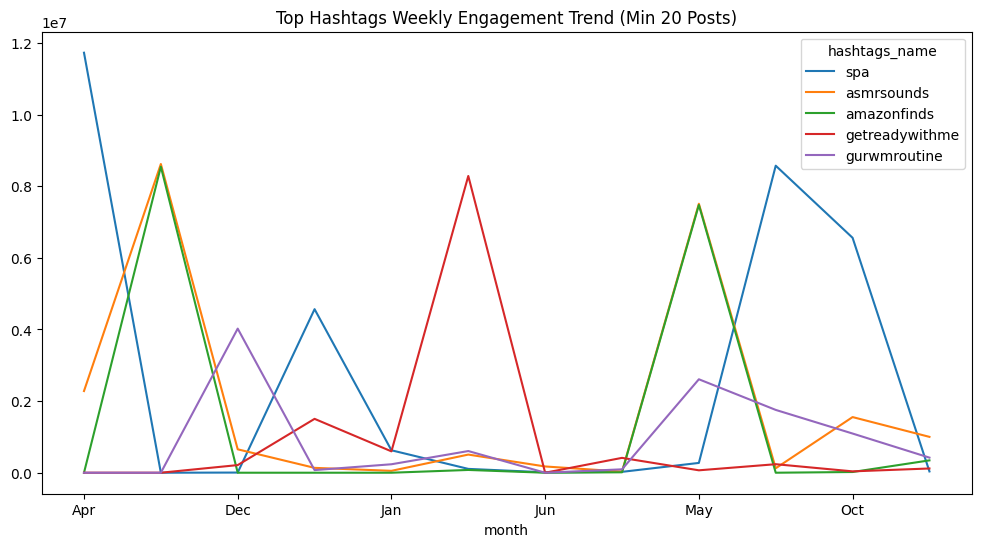

In [ ]:
# 1. Compute total post counts per hashtag
hashtag_post_counts = df_exploded.groupby('hashtags_name')['id'].nunique()

# 2. Filter hashtags with at least 20 posts
valid_hashtags = hashtag_post_counts[hashtag_post_counts >= 20].index

# 3. Weekly engagement pivot (only for valid hashtags)
weekly_trend = (
    df_exploded[df_exploded['hashtags_name'].isin(valid_hashtags)]
    .groupby(['month', 'hashtags_name'])['engagement']
    .mean()
    .unstack()
    .fillna(0)
)

# 4. Select top 5 trending hashtags by average weekly engagement
top_tags = weekly_trend.mean().nlargest(5).index

# 5. Plot
weekly_trend[top_tags].plot(figsize=(12, 6), title='Top Hashtags Weekly Engagement Trend (Min 20 Posts)')


In [ ]:
def plot_top_hashtags(top_n=20, min_posts=200):
   
    hashtag_stats = (
        df_exploded.groupby('hashtags_name')
        .agg(total_posts=('id', 'nunique'), average_engagement=('engagement', 'mean'))
        .reset_index()
    )

    
    hashtag_stats = hashtag_stats[hashtag_stats['total_posts'] >= min_posts]

    #composite score
    hashtag_stats['score'] = hashtag_stats['average_engagement'] * np.log1p(hashtag_stats['total_posts'])

 
    top_hashtags = hashtag_stats.sort_values('score', ascending=False).head(top_n)

 
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_hashtags['score'], y=top_hashtags['hashtags_name'], palette='viridis')
    plt.title(f'Top {top_n} Hashtags by Engagement (Min {min_posts} Posts)')
    plt.xlabel('Engagement Score penalized with posts')
    plt.ylabel('Hashtag')
    plt.tight_layout()
    plt.show()


slider_n = widgets.IntSlider(value=20, min=1, max=50, step=1, description='Top N:')
slider_min = widgets.IntSlider(value=10, min=1, max=1000, step=1, description='Min Posts:')

# Interactive widget
display(widgets.interactive(plot_top_hashtags, top_n=slider_n, min_posts=slider_min))


interactive(children=(IntSlider(value=20, description='Top N:', max=50, min=1), IntSlider(value=10, descriptio…

In [18]:
import ipywidgets as widgets
from IPython.display import display
from wordcloud import WordCloud

# Pre-calculate hashtag statistics
hashtag_stats = df_exploded.groupby('hashtags_name').agg(
    total_posts=('id', 'nunique'),
    total_engagement=('engagement', 'sum')
).reset_index()

# Interactive function
def generate_wordcloud(min_posts=10, min_engagement=50000):
    # Filter based on widget inputs
    filtered_stats = hashtag_stats[
        (hashtag_stats['total_posts'] >= min_posts) &
        (hashtag_stats['total_engagement'] >= min_engagement)
    ]
    
    # If no hashtags match, show message
    if filtered_stats.empty:
        print("No hashtags meet the criteria.")
        return
    
    # Convert to dict for WordCloud
    hashtag_dict = dict(zip(filtered_stats['hashtags_name'], filtered_stats['total_engagement']))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_dict)
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Hashtags (≥ {min_posts} Posts, ≥ {min_engagement} Engagement)')
    plt.show()

# Widgets
post_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Min Posts:')
engagement_slider = widgets.IntSlider(value=50000, min=1000, max=500000, step=1000, description='Min Engagement:')

# Display
display(widgets.interactive(generate_wordcloud, min_posts=post_slider, min_engagement=engagement_slider))


interactive(children=(IntSlider(value=10, description='Min Posts:', min=1), IntSlider(value=50000, description…

In [19]:
hashtag_trends.columns

Index(['year', 'week', 'hashtags_name', 'count'], dtype='object')

In [20]:
# Normalized and smoothened graph
top_n_selector = widgets.IntSlider(
    value=2,
    min=1,
    max=10,  
    step=1,
    description='Top N Hashtags:',
    continuous_update=False
)


year_selector = widgets.SelectMultiple(
    options=sorted(hashtag_trends['year'].unique()),
    value=sorted(hashtag_trends['year'].unique()),
    description="Years",
    disabled=False
)

min_post_count_selector = widgets.IntSlider(
    value=100,
    min=0,
    max=10000,
    step=100,
    description='Min Posts/ hashtag:',
    continuous_update=False
)


if 'date' not in hashtag_trends.columns:
    hashtag_trends['date'] = pd.to_datetime(hashtag_trends['year'].astype(str) + '-' + hashtag_trends['week'].astype(str) + '-1', format='%Y-%W-%w')
hashtag_trends.set_index('date', inplace=True)


hashtag_time_series = hashtag_trends.pivot_table(index=hashtag_trends.index, columns='hashtags_name', values='count', aggfunc='sum')

def update_plot_normalized(selected_top_n, selected_years, min_post_count):
    filtered = hashtag_time_series[hashtag_time_series.index.year.isin(selected_years)]
    
    
    hashtag_totals = filtered.sum()
    filtered_hashtags = hashtag_totals[hashtag_totals >= min_post_count].index
    
  
    top_hashtags = hashtag_totals[filtered_hashtags].nlargest(selected_top_n).index
    
 
    normalized = filtered[top_hashtags].apply(lambda x: x / x.max(), axis=0)

    plt.figure(figsize=(12, 6))
    normalized.plot()
    plt.title(f'Relative Trending of Top {selected_top_n} Hashtags (Min Posts: {min_post_count}) Normalized')
    plt.ylabel('Relative Popularity (0-1)')
    plt.xlabel('Date')
    plt.legend(title='Hashtags')
    plt.tight_layout()
    plt.show()

def update_plot_smoothed(selected_top_n, selected_years, min_post_count):
  
    filtered = hashtag_time_series[hashtag_time_series.index.year.isin(selected_years)]

    
    hashtag_totals = filtered.sum()
    filtered_hashtags = hashtag_totals[hashtag_totals >= min_post_count].index

   
    top_hashtags = hashtag_totals[filtered_hashtags].nlargest(selected_top_n).index

    
    smoothed = filtered[top_hashtags].rolling(window=4, min_periods=1).mean()

  
    normalized = smoothed.apply(lambda x: x / x.max(), axis=0)

    
    plt.figure(figsize=(12, 6))
    normalized.plot(linewidth=2, alpha=0.9)
    plt.title(f'Relative Trending of Top {selected_top_n} Hashtags (Min Posts: {min_post_count}) Smoothed')
    plt.ylabel('Relative Popularity (Smoothed 0-1)')
    plt.xlabel('Date')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Hashtags')
    plt.tight_layout()
    plt.show()


widgets.interactive(update_plot_smoothed,
                    selected_top_n=top_n_selector,
                    selected_years=year_selector,
                    min_post_count=min_post_count_selector)



interactive(children=(IntSlider(value=2, continuous_update=False, description='Top N Hashtags:', max=10, min=1…

In [21]:
widgets.interactive(update_plot_normalized,
                    selected_top_n=top_n_selector,
                    selected_years=year_selector,
                    min_post_count=min_post_count_selector)


interactive(children=(IntSlider(value=2, continuous_update=False, description='Top N Hashtags:', max=10, min=1…

Does higher number of hashtags means better enagagement?

In [22]:

# Interactive plotting function
def plot_engagement_vs_hashtag_count(min_posts=1, max_engagement=1e9):
    # Recalculate post count per hashtag volume
    post_counts = df.groupby('num_hashtags')['id'].nunique()
    
    # Calculate average engagement
    volume_engagement = df.groupby('num_hashtags')['engagement'].mean()
    
    # Combine into a DataFrame
    volume_df = pd.DataFrame({
        'avg_engagement': volume_engagement,
        'post_count': post_counts
    }).reset_index()
    
    # Apply filters
    filtered = volume_df[
        (volume_df['post_count'] >= min_posts) &
        (volume_df['avg_engagement'] <= max_engagement)
    ]
    
    # Plot
    plt.figure(figsize=(8,5))
    sns.lineplot(x=filtered['num_hashtags'], y=filtered['avg_engagement'], marker='o')
    plt.title('Engagement vs Number of Hashtags')
    plt.xlabel('Number of Hashtags')
    plt.ylabel('Average Engagement')
    plt.tight_layout()
    plt.show()

# Create sliders
min_posts_slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='Min Posts:')
max_engagement_slider = widgets.FloatLogSlider(value=1e8, base=10, min=3, max=10, step=0.1, description='Max Engagement:')

# Display interactive plot
display(widgets.interactive(
    plot_engagement_vs_hashtag_count,
    min_posts=min_posts_slider,
    max_engagement=max_engagement_slider
))

# Basically if I have a post with 2 hashtags but a high engagement rate, it would give me a biased answer. So what we do here
# is that we set minimum posts 

#For posts with 2 hashtags, there are only 3 posts, and their average engagement is 100,000.
#For posts with 3 hashtags, there are 500 posts, and their average engagement is 40,000.

# If I set the Min Posts slider to 10, then:

#The 2-hashtag group only 3 posts is excluded from the chart.

# The 3-hashtag group with 500 posts is included.

interactive(children=(IntSlider(value=1, description='Min Posts:', min=1), FloatLogSlider(value=100000000.0, d…

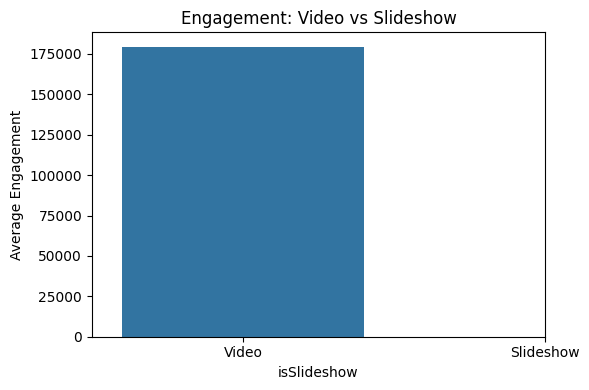

In [23]:
# Engagement by Content Type
content_type_engagement = df.groupby('isSlideshow')['engagement'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=content_type_engagement.index, y=content_type_engagement.values)
plt.title('Engagement: Video vs Slideshow')
plt.xticks([0, 1], ['Video', 'Slideshow'])
plt.ylabel('Average Engagement')
plt.tight_layout()
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Function to update the intent plot with filtering
def plot_intent_engagement(keywords_str, min_posts, min_engagement):
    # Process intent keywords
    intent_keywords = [kw.strip().lower() for kw in keywords_str.split(',') if kw.strip()]
    
    # Tag posts based on keywords
    df_exploded['intent'] = df_exploded['hashtags_name'].apply(
        lambda x: any(kw in str(x).lower() for kw in intent_keywords)
    )

    # Group by intent and calculate both counts and engagement
    grouped = df_exploded.groupby('intent').agg(
        total_posts=('id', 'nunique'),
        avg_engagement=('engagement', 'mean')
    )

    # Apply filters
    filtered = grouped[(grouped['total_posts'] >= min_posts) & (grouped['avg_engagement'] >= min_engagement)]

    # Plot if data exists
    if not filtered.empty:
        plt.figure(figsize=(6,4))
        sns.barplot(x=filtered.index.map({False: 'General', True: 'Purchase Intent'}), 
                    y=filtered['avg_engagement'].values)
        plt.title('Engagement: Purchase-Intent vs Other Hashtags')
        plt.ylabel('Average Engagement')
        plt.xlabel('Hashtag Category')
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No data matches the selected filters.")

# Widgets
keyword_input = widgets.Text(
    value='buy, shop, recommend, best, treatment, solution, review',
    description='Keywords:',
    layout=widgets.Layout(width='80%')
)

min_posts_slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='Min Posts:')
min_engagement_slider = widgets.IntSlider(value=0, min=0, max=50000, step=1000, description='Min Engagement:')

# Display interactive widget
display(widgets.interactive(
    plot_intent_engagement,
    keywords_str=keyword_input,
    min_posts=min_posts_slider,
    min_engagement=min_engagement_slider
))


interactive(children=(Text(value='buy, shop, recommend, best, treatment, solution, review', description='Keywo…

In [25]:

df_exploded['year_month'] = df_exploded['createTimeISO'].dt.to_period('M')

# Step 2: Group by hashtag and month
monthly_stats = (
    df_exploded.groupby(['hashtags_name', 'year_month'])
    .agg(posts_per_month=('id', 'count'),
         engagement_per_month=('engagement', 'sum'))
    .reset_index()
)

# Widgets
min_posts_slider = widgets.IntSlider(value=3, min=1, max=20, step=1, description='Min Posts/Month')
min_engagement_slider = widgets.IntSlider(value=5000, min=0, max=100000, step=1000, description='Min Engagement/Month')
top_n_slider = widgets.IntSlider(value=20, min=5, max=50, step=1, description='Top N')

def update_lifecycle(min_posts, min_engagement, top_n):
    # Step 3: Filter based on thresholds
    filtered = monthly_stats[
        (monthly_stats['posts_per_month'] >= min_posts) &
        (monthly_stats['engagement_per_month'] >= min_engagement)
    ]

    # Step 4: Count active months
    active_months = (
        filtered.groupby('hashtags_name')['year_month']
        .nunique()
        .sort_values(ascending=False)
        .head(top_n)
    )

    # Plot
    plt.figure(figsize=(12,6))
    sns.barplot(x=active_months.values, y=active_months.index)
    plt.title(f'Top {top_n} Hashtags by Sustained Activity (Active Months)')
    plt.xlabel('Active Months')
    plt.ylabel('Hashtag')
    plt.tight_layout()
    plt.show()

widgets.interactive(
    update_lifecycle,
    min_posts=min_posts_slider,
    min_engagement=min_engagement_slider,
    top_n=top_n_slider
)

/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_5726/4078687847.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_exploded['year_month'] = df_exploded['createTimeISO'].dt.to_period('M')


interactive(children=(IntSlider(value=3, description='Min Posts/Month', max=20, min=1), IntSlider(value=5000, …

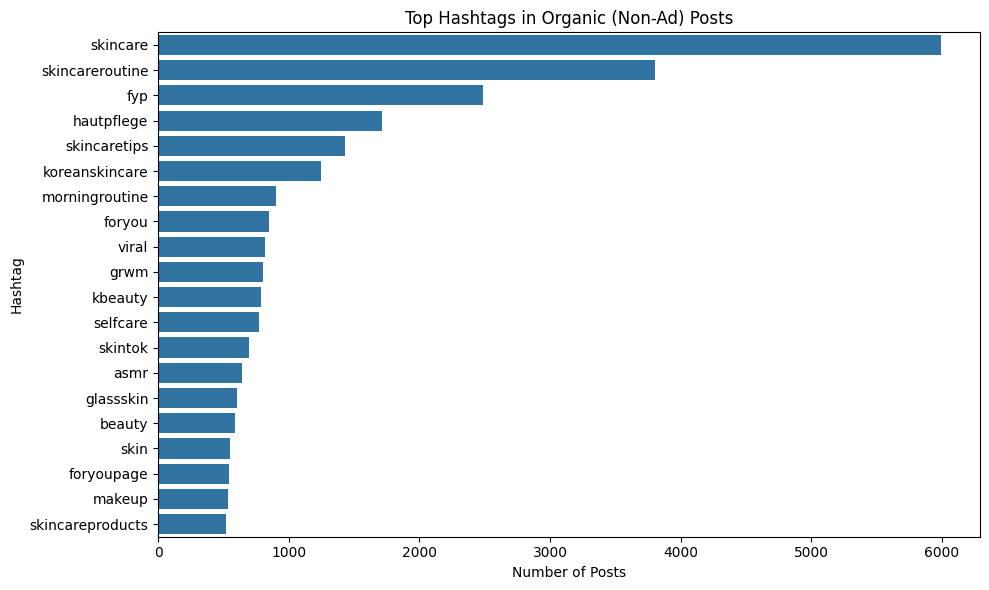

In [26]:


# 14. UGC Opportunities: Which Hashtags Appear Most in Non-Ads
ugc_hashtags = df_exploded[df['isAd'] == False]['hashtags_name'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=ugc_hashtags.values, y=ugc_hashtags.index)
plt.title('Top Hashtags in Organic (Non-Ad) Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()





## Music Meta
